In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import linear regression model
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor

In [2]:
A= pd.read_csv('fair_pay_data.csv', index_col=0)

In [3]:
A= pd.get_dummies(A, columns=['job_level'])
A= pd.get_dummies(A, columns=['department'])
A= pd.get_dummies(A, columns=['new_hire'])

In [4]:
x= A.drop(columns= ['salary'])
y= A['salary']

In [5]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.3, random_state=1)

In [6]:
rfc= RandomForestRegressor(n_estimators= 500 ,max_features= 2)
rfc.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [7]:
predict= rfc.predict(xtrain)
predict

array([64116.90531293, 63502.31104251, 64660.15754873, ...,
       63722.41996735, 64660.15754873, 64660.15754873])

In [10]:
rmse= np.sqrt(np.sum((predict-ytrain)**2/len(ytrain)))
rmse

8946.93949210822

In [14]:
predict1= rfc.predict(xtest)

rmse1= np.sqrt(np.sum((predict1-ytest)**2/len(ytest)))


In [15]:
rmse1

8835.945345333805

In [16]:
mape=(np.absolute((ytest-predict1)/ytest))/len(ytest)

In [20]:

features= A.columns
importances=rfc.feature_importances_
indices=np.argsort(importances)

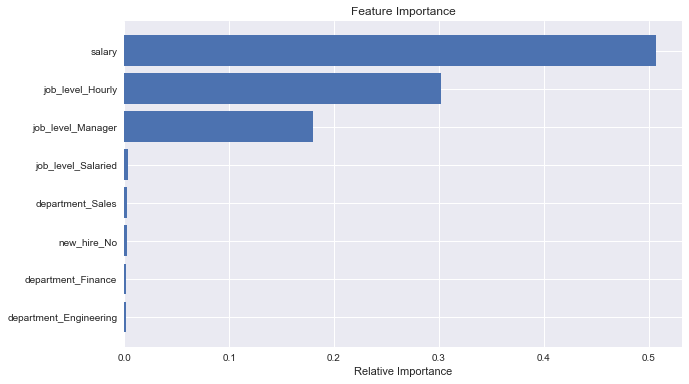

In [21]:
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()